In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import types
from botocore.client import Config
import ibm_boto3

### Create Data Frame from HTML

In [2]:
data_VIE=pd.read_html('https://www.wien.gv.at/statistik/wirtschaft/tabellen/ankuenfte-bezirk-zr.html', header=1)


In [3]:
df=data_VIE[0]
df.head()

,Bezirk,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Wien,4 235 317,4 593 960,4 385 529,4 878 654,5 227 576,5 604 522,5 836 669,6 210 888,6 589 031,6 883 512,7 099 233,7 539 810,7 926 768
1,1. Innere Stadt,841 697,835 643,805 043,884 628,904 464,937 411,943 716,902 413,1 001 587,1 015 959,1 090 591,1 197 254,1 275 760
2,2. Leopoldstadt,377 784,414 997,430 026,496 373,570 383,637 035,663 861,772 967,779 312,811 509,833 017,885 758,973 318
3,3. Landstraße,546 213,572 210,535 218,588 963,655 520,732 141,747 021,831 127,918 055,962 972,973 728,1 030 870,989 618
4,4. Wieden,165 778,170 826,162 549,186 626,236 138,240 518,237 355,261 530,277 954,294 223,293 064,302 028,326 378


### Clean Data

In [4]:
df.drop(columns=['2007','2008','2009','2010', '2011', '2012','2013', '2014', '2015', '2016', '2017', '2018'], inplace=True)
df.drop(index=0, inplace=True)
df.rename(columns={"Bezirk": "District"}, inplace=True)
df.head()

,District,2019
1,1. Innere Stadt,1 275 760
2,2. Leopoldstadt,973 318
3,3. Landstraße,989 618
4,4. Wieden,326 378
5,5. Margareten,281 207


In [5]:
df.District=(df.District.str.split(".", n=1, expand=True)[1])
df.head()

,District,2019
1,Innere Stadt,1 275 760
2,Leopoldstadt,973 318
3,Landstraße,989 618
4,Wieden,326 378
5,Margareten,281 207


In [6]:
df['2019']= df['2019'].str.replace(" ","")
df['2019']=df['2019'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  23 non-null     object
 1   2019      23 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 552.0+ bytes


In [7]:
df['District']= df['District'].str.replace("ä","ae")
df['District']= df['District'].str.replace("ö","oe")
df['District']= df['District'].str.replace("ß","ss")

In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,District,2019
0,Innere Stadt,1275760
1,Leopoldstadt,973318
2,Landstrasse,989618
3,Wieden,326378
4,Margareten,281207


In [9]:
df.sort_values(by=['2019'], ascending=False, inplace=True)
df.head()

,District,2019
0,Innere Stadt,1275760
2,Landstrasse,989618
1,Leopoldstadt,973318
9,Favoriten,878181
6,Neubau,486980


### Visualize the Nr. of check-ins in each district

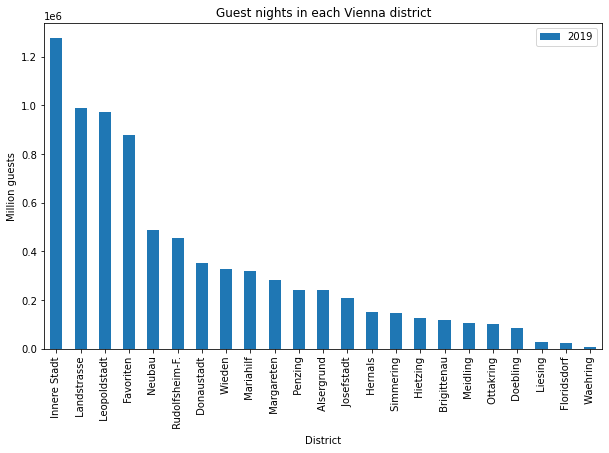

In [10]:
df.plot(kind='bar', x='District', figsize=(10,6))
plt.xlabel('District')
plt.ylabel('Million guests')
plt.title('Guest nights in each Vienna district')

plt.show()

As it´s visible from the above plot, the 5 most visited districts are "Innere Stadt", "Landstrasse", "Leopoldstadt", "Favoriten" and "Neubau"

# Car Rentals in Vienna

### load district coordinates

In [11]:

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_da45e8dfcf4e445e97e4eaaff77ccb4c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wqnNrAet1uZnOBesbunIzcdo_wj8M4KMUMbMFMgMBn06',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_da45e8dfcf4e445e97e4eaaff77ccb4c.get_object(Bucket='courseracapstone-donotdelete-pr-prsarltz0orqtg',Key='wien_coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, delimiter=';')
df_data_1.head()


,Bezirk,Latitude,Longitude
0,Innere Stadt,48.209722,16.370000
1,Leopoldstadt,48.210278,16.412222
2,Landstrasse,48.196389,16.395833
3,Wieden,48.193056,16.370556
4,Margareten,48.187222,16.353056


In [12]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bezirk     23 non-null     object 
 1   Latitude   23 non-null     float64
 2   Longitude  23 non-null     float64
dtypes: float64(2), object(1)
memory usage: 680.0+ bytes


In [13]:
df_data_1.rename(columns={"Bezirk": "District"}, inplace=True)

### Create merged Data Frame with all important information

In [14]:
merged_df=df.join(df_data_1[["Latitude", "Longitude"]])
merged_df.head()

,District,2019,Latitude,Longitude
0,Innere Stadt,1275760,48.209722,16.370000
2,Landstrasse,989618,48.196389,16.395833
1,Leopoldstadt,973318,48.210278,16.412222
9,Favoriten,878181,48.157778,16.359167
6,Neubau,486980,48.202500,16.348056


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 17
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   23 non-null     object 
 1   2019       23 non-null     int64  
 2   Latitude   23 non-null     float64
 3   Longitude  23 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


## Let´s visualize the 5 most visited districts

In [16]:
merged_df.sort_values(by=['2019'], ascending=False, inplace=True)
merged_df.head()

,District,2019,Latitude,Longitude
0,Innere Stadt,1275760,48.209722,16.370000
2,Landstrasse,989618,48.196389,16.395833
1,Leopoldstadt,973318,48.210278,16.412222
9,Favoriten,878181,48.157778,16.359167
6,Neubau,486980,48.202500,16.348056


In [17]:
merged_df.reset_index(drop=True, inplace=True)
merged_df=merged_df[:5]
merged_df

,District,2019,Latitude,Longitude
0,Innere Stadt,1275760,48.209722,16.370000
1,Landstrasse,989618,48.196389,16.395833
2,Leopoldstadt,973318,48.210278,16.412222
3,Favoriten,878181,48.157778,16.359167
4,Neubau,486980,48.202500,16.348056


In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install geopy
from geopy.geocoders import Nominatim 

import requests

import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium

from pandas.io.json import json_normalize


In [19]:
address = 'Vienna, Austria'

geolocator = Nominatim(user_agent="vie_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Vienna are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Vienna are 48.2083537, 16.3725042.


In [20]:
map_vienna = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df["District"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna)  
    
map_vienna



# Get information from Foursquare

In [21]:
CLIENT_ID = 'VRMUPBVUWAACRH1B40VUCXYRV3UGMGAXQYNJNK1ST0VYQKTZ'
CLIENT_SECRET = 'WJ0GPJSTTWECW02BJE4350BCDOZYOKJFEZI0PP1R5Y1TVPWF'
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VRMUPBVUWAACRH1B40VUCXYRV3UGMGAXQYNJNK1ST0VYQKTZ
CLIENT_SECRET:WJ0GPJSTTWECW02BJE4350BCDOZYOKJFEZI0PP1R5Y1TVPWF


## print and visualize the information about the offices

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, query="Rental Car Location"):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT,
            query)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Venue', 
                  'Latitude', 
                  'Longitude']
    
    return(nearby_venues)

In [23]:
vienna_venues = getNearbyVenues(names=merged_df['District'],
                                   latitudes=merged_df['Latitude'],
                                   longitudes=merged_df['Longitude']
                                  )


 Innere Stadt
 Landstrasse
 Leopoldstadt
 Favoriten
 Neubau


In [24]:
print(vienna_venues.shape)
vienna_venues.head()

(28, 4)


,District,Venue,Latitude,Longitude
0,Innere Stadt,Europcar Schubertring,48.202179,16.375251
1,Innere Stadt,Car 2 Go Zentrale,48.210264,16.386835
2,Innere Stadt,Avis Österreich,48.212826,16.361675
3,Innere Stadt,Budget Österreich,48.214505,16.361503
4,Innere Stadt,Car2go Moving Target,48.215040,16.361505


Remove Car2Go from the results

In [25]:
vienna_venues=vienna_venues[~vienna_venues.Venue.str.contains("2")]
vienna_venues

,District,Venue,Latitude,Longitude
0,Innere Stadt,Europcar Schubertring,48.202179,16.375251
2,Innere Stadt,Avis Österreich,48.212826,16.361675
3,Innere Stadt,Budget Österreich,48.214505,16.361503
5,Innere Stadt,Hertz,48.201559,16.373967
6,Innere Stadt,Sixt Rent A Car,48.205939,16.383587
7,Landstrasse,Europcar Schubertring,48.202179,16.375251
9,Landstrasse,Buchbinder,48.192702,16.403542
10,Landstrasse,Interrent Wien Schlachthausgasse,48.192569,16.403437
11,Landstrasse,Sixt Rent A Car,48.205939,16.383587
12,Landstrasse,Dollar Rent A Car,48.184616,16.404453


In [26]:
vienna_venues.District.value_counts()

 Landstrasse     13
 Innere Stadt     5
 Neubau           4
 Favoriten        1
Name: District, dtype: int64

In [27]:
map_rental = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(vienna_venues['Latitude'], vienna_venues['Longitude'], vienna_venues["Venue"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rental)  
    
map_rental
